# Credit Card Fraud Detection

## Imports

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold

In [6]:
from sklearn.linear_model import LinearRegression, RidgeClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [7]:
from sklearn.metrics import classification_report, confusion_matrix, average_precision_score
from sklearn.utils.class_weight import compute_class_weight
#from sklearn.model_selection import GridSearchCV
#from bayes_opt import BayesianOptimization
import optuna


## Reading dataset

In [8]:
df = pd.read_csv('../data/creditcard.csv')

In [9]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
df.shape

(284807, 31)

In [11]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Exploration

### Missing values

In [12]:
missing = df.isnull().sum()
print("Missing values per column:\n", missing[missing > 0])

Missing values per column:
 Series([], dtype: int64)


#### Observation

* There are no Null Values. The dataset seems cleaned up properly

### Class Distribution (Fraud vs. Non-Fraud)

In [13]:
# Target variable is 'Class' (1 = fraud, 0 = not fraud)
class_counts = df['Class'].value_counts()
print("Class distribution:\n", class_counts)

Class distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


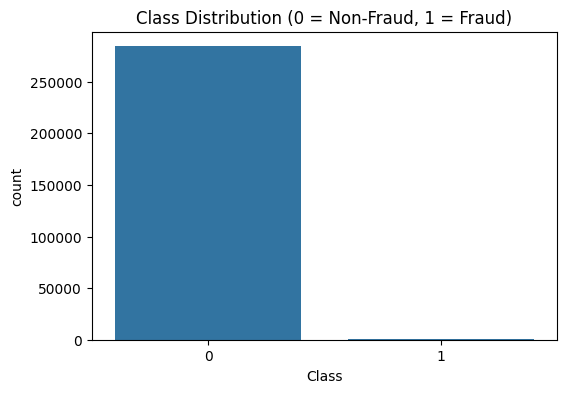

In [14]:
## Visualize class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0 = Non-Fraud, 1 = Fraud)')
plt.show()

### Time and Amount Feature

                Time         Amount
count  284807.000000  284807.000000
mean    94813.859575      88.349619
std     47488.145955     250.120109
min         0.000000       0.000000
25%     54201.500000       5.600000
50%     84692.000000      22.000000
75%    139320.500000      77.165000
max    172792.000000   25691.160000


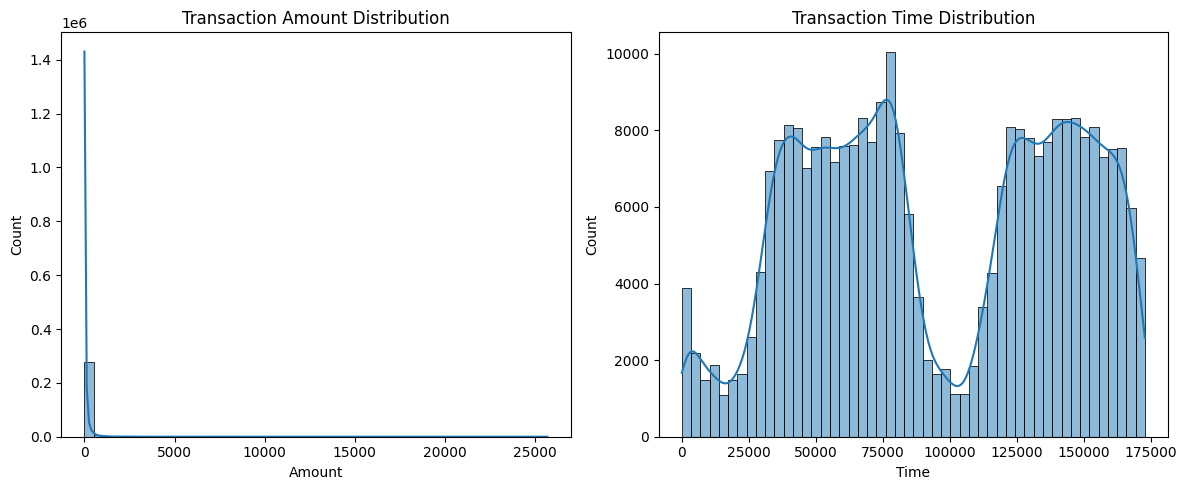

In [15]:
# Basic stats of Amount and Time
print(df[['Time', 'Amount']].describe())

# Histograms for visual inspection
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['Time'], bins=50, kde=True)
plt.title('Transaction Time Distribution')

plt.tight_layout()
plt.show()

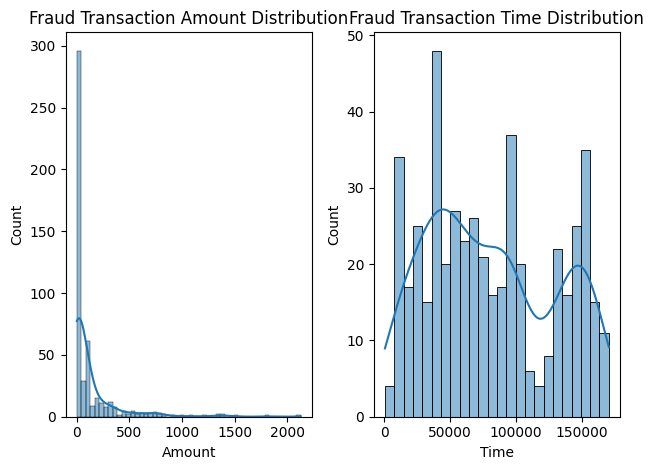

In [16]:
df_fraud = df[df['Class'] == 1]

plt.subplot(1, 2, 1)
sns.histplot(df_fraud['Amount'], bins=50, kde=True)
plt.title('Fraud Transaction Amount Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df_fraud['Time'], bins=24, kde=True)
plt.title('Fraud Transaction Time Distribution')
plt.tight_layout()
plt.show()

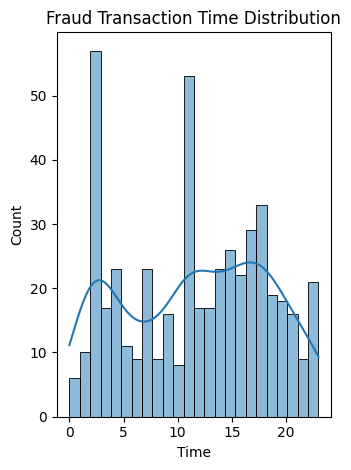

In [17]:
plt.subplot(1, 2, 2)
sns.histplot(x=(df.loc[df["Class"] == 1, "Time"] // 3600) % 24, bins=24, kde=True)
plt.title('Fraud Transaction Time Distribution')
plt.tight_layout()
plt.show()

#### Observation

* Most fraudulent transactions occur with smaller amounts
* Highest frauds are committed early into the day

### Correlation

In [18]:
correlation = df.corr()['Class'].sort_values(ascending=False)[:10]
print("Top features positively correlated with fraud:\n", correlation)

Top features positively correlated with fraud:
 Class    1.000000
V11      0.154876
V4       0.133447
V2       0.091289
V21      0.040413
V19      0.034783
V20      0.020090
V8       0.019875
V27      0.017580
V28      0.009536
Name: Class, dtype: float64


In [19]:
corr_features = correlation.index.tolist()
corr_features

['Class', 'V11', 'V4', 'V2', 'V21', 'V19', 'V20', 'V8', 'V27', 'V28']

#### Correlation Heatmap

Text(0.5, 1.0, 'Top Features Correlated with Fraud')

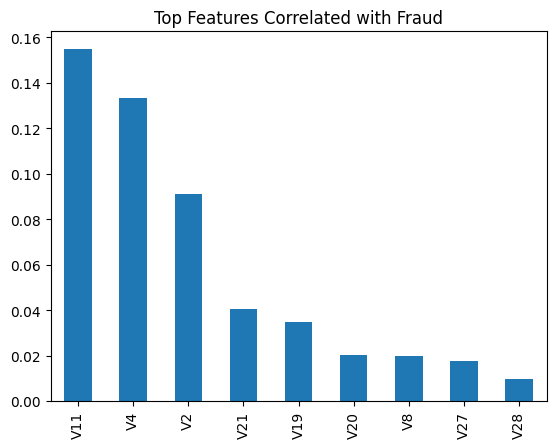

In [29]:
correlation.drop(["Class"]).plot(kind='bar')
plt.title('Top Features Correlated with Fraud')

In [23]:
top10features = df.corr()[corr_features].loc[corr_features]
top10features


,Class,V11,V4,V2,V21,V19,V20,V8,V27,V28
Class,1.000000,1.548756e-01,1.334475e-01,9.128865e-02,4.041338e-02,3.478301e-02,2.009032e-02,1.987512e-02,1.757973e-02,9.536041e-03
V11,0.154876,1.000000e+00,3.459380e-16,1.975426e-16,-5.658364e-16,-7.389748e-16,-1.481299e-16,2.487043e-16,-2.640281e-16,-3.792314e-16
V4,0.133447,3.459380e-16,1.000000e+00,-1.121065e-15,-1.949553e-16,-3.980557e-16,-1.857247e-16,5.697192e-16,3.977061e-17,-2.761403e-18
V2,0.091289,1.975426e-16,-1.121065e-15,1.000000e+00,-8.480447e-17,-7.118719e-18,2.506675e-16,-5.377041e-17,-4.966953e-16,-5.093836e-16
V21,0.040413,-5.658364e-16,-1.949553e-16,-8.480447e-17,1.000000e+00,5.115885e-16,-7.614597e-16,3.892798e-16,-1.211281e-15,5.278775e-16
V19,0.034783,-7.389748e-16,-3.980557e-16,-7.118719e-18,5.115885e-16,1.000000e+00,2.614882e-16,-3.875186e-16,-2.959370e-16,-1.405379e-15
V20,0.020090,-1.481299e-16,-1.857247e-16,2.506675e-16,-7.614597e-16,2.614882e-16,1.000000e+00,2.033737e-16,-1.138829e-15,-2.436795e-16
V8,0.019875,2.487043e-16,5.697192e-16,-5.377041e-17,3.892798e-16,-3.875186e-16,2.033737e-16,1.000000e+00,1.299943e-16,-6.200930e-16
V27,0.017580,-2.640281e-16,3.977061e-17,-4.966953e-16,-1.211281e-15,-2.959370e-16,-1.138829e-15,1.299943e-16,1.000000e+00,-3.061287e-16
V28,0.009536,-3.792314e-16,-2.761403e-18,-5.093836e-16,5.278775e-16,-1.405379e-15,-2.436795e-16,-6.200930e-16,-3.061287e-16,1.000000e+00


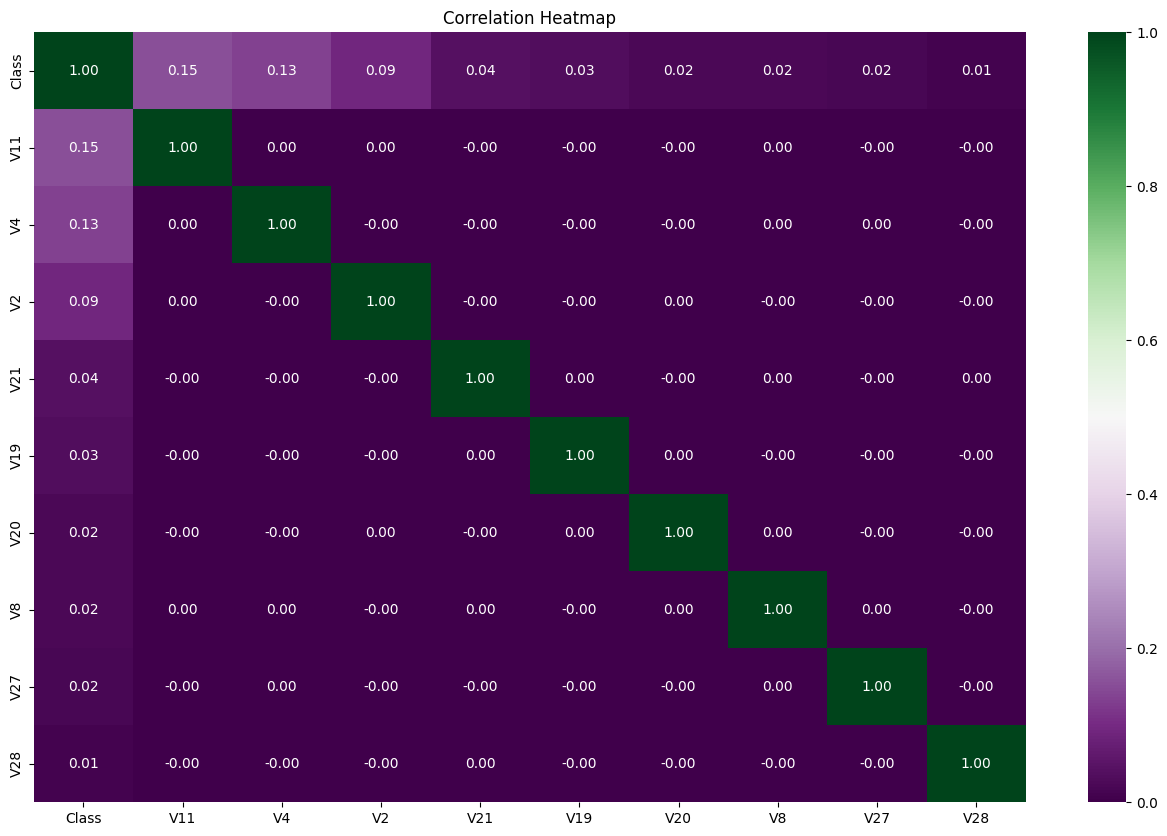

In [22]:
plt.figure(figsize=(16,10))
sns.heatmap(top10features, annot=True, cmap='PRGn', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [24]:
sns.barplot(x=top10features.values, y=top10features.index, palette="viridis")

ValueError: Per-column arrays must each be 1-dimensional

### Splitting Data into Training and Test data

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
y = df['Class']
X = df.drop('Class', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train set class distribution:\n", y_train.value_counts())
print("Test set class distribution:\n", y_test.value_counts())

Train set class distribution:
 Class
0    227451
1       394
Name: count, dtype: int64
Test set class distribution:
 Class
0    56864
1       98
Name: count, dtype: int64


### Handling CLASS IMBALANCE

Handling class imblance can be in done in many ways:
* Random Undersampling of the majority class (5 times the size of minority class)
* SMOTE Oversampling of the minority class (matching the size of majority class)
* Using Class Weights in algorithms

In this Project we will opt for using Class Weights

In [24]:
classes = np.array([0, 1])
cw = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
class_weight = {0: cw[0], 1: cw[1]}

In [25]:
neg = np.sum(y_train == 0)
pos = np.sum(y_train == 1)
scale_pos_weight = neg / pos

In [26]:
sample_weight = np.array([class_weight[y] for y in y_train])

### Scaling

In [27]:
ss = StandardScaler()

X_train['Scaled_Amount'] = ss.fit_transform(X_train['Amount'].values.reshape(-1,1))
X_train['Scaled_Time'] = ss.fit_transform(X_train['Time'].values.reshape(-1,1))

X_test['Scaled_Amount'] = ss.transform(X_test['Amount'].values.reshape(-1,1))
X_test['Scaled_Time'] = ss.transform(X_test['Time'].values.reshape(-1,1))

In [28]:
X_train.drop(['Time', 'Amount'], axis=1, inplace=True)
X_test.drop(['Time', 'Amount'], axis=1, inplace=True)

In [29]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Scaled_Amount,Scaled_Time
265518,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,-0.157403,...,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,-0.322494,1.411588
180305,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,0.284864,...,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,-0.339764,0.623141
42664,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,-2.009561,...,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,0.346693,-1.130680
198723,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,1.756121,...,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,-0.327360,0.794699
82325,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,-0.558955,...,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,-0.008281,-0.748102


In [30]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Scaled_Amount,Scaled_Time
263020,-0.674466,1.408105,-1.110622,-1.328366,1.388996,-1.308439,1.885879,-0.614233,0.311652,0.650757,...,0.080084,0.810034,-0.224327,0.707899,-0.135837,0.045102,0.533837,0.291319,-1.997588,1.387182
11378,-2.829816,-2.765149,2.537793,-1.074580,2.842559,-2.153536,-1.795519,-0.250020,3.073504,-1.000418,...,-0.295555,0.109305,-0.813272,0.042996,-0.027660,-0.910247,0.110802,-0.511938,-1.997823,-1.580138
147283,-3.576495,2.318422,1.306985,3.263665,1.127818,2.865246,1.444125,-0.718922,1.874046,7.398491,...,-1.060151,0.016867,-0.132058,-1.483996,-0.296011,0.062823,0.552411,0.509764,-1.996471,-0.138120
219439,2.060386,-0.015382,-1.082544,0.386019,-0.024331,-1.074935,0.207792,-0.338140,0.455091,0.047859,...,-0.281684,-0.639426,0.331818,-0.067584,-0.283675,0.203529,-0.063621,-0.060077,-1.998052,0.986536
36939,1.209965,1.384303,-1.343531,1.763636,0.662351,-2.113384,0.854039,-0.475963,-0.629658,-1.579654,...,-0.164015,-0.328294,-0.154631,0.619449,0.818998,-0.330525,0.046884,0.104527,-1.998041,-1.182272


## Model Training

#### Evaluation Function

In [31]:
def evaluate_model(y_test, y_score, threshold=0.5):
    y_pred = (np.array(y_score) >= threshold).astype(int)

    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))
    print("Average Precision Score (PR-AUC):", average_precision_score(y_test, y_score))

    return average_precision_score(y_test, y_score)

In [ ]:
models = {
    'Linear Regression': LinearRegression(), # No class weight
    'Ridge Classifier': RidgeClassifier(class_weight=class_weight, random_state=42),
    'Lasso Regression': LogisticRegression(penalty='l1', solver='liblinear', class_weight=class_weight, random_state=42), # Using Logistic Regression with L1 penalty as Lasso is not for classification
    'Logistic Regression': LogisticRegression(class_weight=class_weight, random_state=42),
    'K-Neighbors Classifier': KNeighborsClassifier(), # Does not need class weight
    'Decision Tree Classifier': DecisionTreeClassifier(class_weight=class_weight, random_state=42),
    'Random Forest Classifier': RandomForestClassifier(class_weight=class_weight, random_state=42),
    'Gradient Boosting Classifier': GradientBoostingClassifier(random_state=42), # No class weight parameter
    'AdaBoost Classifier': AdaBoostClassifier(random_state=42),  # No class weight parameter
    'XGBoost Classifier': XGBClassifier(scale_pos_weight=scale_pos_weight, eval_metric='logloss', random_state=42),
    'CatBoost Classifier': CatBoostClassifier(class_weights=[class_weight[0], class_weight[1]], verbose=False, random_state=42),
    'LightGBM Classifier': LGBMClassifier(scale_pos_weight=scale_pos_weight, random_state=42)
}

#### Model training and evaluation

In [ ]:
model_list = []
avg_precision_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model_name = list(models.keys())[i]
    if model_name in ['Gradient Boosting Classifier', 'AdaBoost Classifier', 'Linear Regression']:
        model.fit(X_train, y_train, sample_weight=sample_weight)
    else:
        model.fit(X_train, y_train)
    

    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test)
    else:
        y_score = model.predict(X_test)
    
    print(model_name)
    model_list.append(model_name)

    model_test_avg_precision = evaluate_model(y_test, y_score, threshold=0.5)
    
    avg_precision_list.append(model_test_avg_precision)
    
    print('='*35)
    print('\n')
    

#### Results

In [ ]:

pd.DataFrame(list(zip(model_list, avg_precision_list)), columns=['Model Name', 'Avg Precision Score']).sort_values(by=["Avg Precision Score"],ascending=False)

#### Observation

Out of these models, the top 2 models that perform the best are:
* Random Forest Classifier
* XGBoost Classifier

We shall try to hyperparameter tune each of these models to see the best one.

### Hyperparameter Tuning

In [ ]:
'''

chosen_model = {
    'Random Forest Classifier': RandomForestClassifier(class_weight=class_weight),
    'XGBoost Classifier': XGBClassifier(scale_pos_weight=scale_pos_weight, eval_metric='logloss'),
    'CatBoost Classifier': CatBoostClassifier(class_weights=[class_weight[0], class_weight[1]],
        verbose=False),
    'K-Neighbors Classifier': KNeighborsClassifier() # Does not need class weight
}

'''

In [ ]:
'''

params = {
    'Random Forest Classifier': {
        "n_estimators": [300, 600, 1000, 1500],
        "max_depth": [None, 5, 10, 15, 20, 30, 40],
        "min_samples_split": [2, 5, 10, 20],
        "min_samples_leaf": [1, 2, 5, 10],
        "max_features": ["sqrt", "log2", 0.3, 0.5, 0.7],  # float = fraction of features
        "bootstrap": [True],
    },
    'XGBoost Classifier': {
        "n_estimators": [300, 600, 1000, 1500, 2000],
        "learning_rate": [0.3, 0.2, 0.1, 0.05, 0.02, 0.01],
        "max_depth": [2, 3, 4, 5, 6, 8, 10],
        "min_child_weight": [1, 2, 5, 10],
        "gamma": [0, 0.1, 0.3, 0.5, 1, 2, 5],
        "subsample": [0.6, 0.7, 0.8, 0.9, 1.0],
        "colsample_bytree": [0.6, 0.7, 0.8, 0.9, 1.0],
        "reg_alpha": [0, 1e-4, 1e-3, 1e-2, 0.1, 1],
        "reg_lambda": [0.5, 1, 2, 5, 10],
    },
    'CatBoost Classifier': {
        "depth": [4, 5, 6, 7, 8, 9, 10],
        "learning_rate": [0.3, 0.2, 0.1, 0.05, 0.02, 0.01],
        "iterations": [500, 1000, 2000, 4000],
        "l2_leaf_reg": [1, 3, 5, 7, 10, 20, 30],
        "bagging_temperature": [0, 0.2, 0.5, 1, 2, 5],
        "random_strength": [1, 5, 10, 20],
        # optional:
        "border_count": [32, 64, 128, 254],
    },
    'K-Neighbors Classifier': {
        "n_neighbors": list(range(3, 51, 2)),   # odd numbers often help tie-breaking
        "weights": ["uniform", "distance"],
        "p": [1, 2],
        "leaf_size": [10, 20, 30, 40, 50, 60],
    }
}

'''

In [ ]:
'''
model_list = []
avg_precision_list =[]

for i in range(len(list(chosen_model))):
    model = list(chosen_model.values())[i]
    model_name = list(chosen_model.keys())[i]
    para = params[list(chosen_model.keys())[i]]
    
    gs = GridSearchCV(model,para,cv=5)
            gs.fit(X_train,y_train)
    
    
    model.set_params(**gs.best_params_)
    model.fit(X_train,y_train)
    
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test)
    else:
        y_score = model.predict(X_test)

    
    print(model_name)
    model_list.append(model_name)

    model_test_avg_precision = evaluate_model(y_test, y_score, threshold=0.5)
    
    avg_precision_list.append(model_test_avg_precision)
    
    print('='*35)
    print('\n')
    
    '''

#### Random Forest Classifier

'Random Forest Classifier': {
        "n_estimators": [300, 600, 1000, 1500],
        "max_depth": [None, 5, 10, 15, 20, 30, 40],
        "min_samples_split": [2, 5, 10, 20],
        "min_samples_leaf": [1, 2, 5, 10],
        "max_features": ["sqrt", "log2", 0.3, 0.5, 0.7],  # float = fraction of features
        "bootstrap": [True],
    }

In [ ]:
X_test

In [ ]:
X_np = X_train.to_numpy(dtype=np.float32, copy=False)
y_np = y_train.to_numpy(dtype=np.int8, copy=False)

In [ ]:
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [ ]:
'''

def objective(trial):
    params = {
        "n_estimators": 300, # STAGE B - trial.suggest_int("n_estimators", 300, 2000, step=100),
        "max_depth": trial.suggest_int("max_depth", 5, 25, step = 5),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", 0.3, 0.5, 0.7]),
        "bootstrap": True,
        "max_samples": trial.suggest_categorical("max_samples", [0.3, 0.5, 0.7, 0.9]),
        "class_weight": class_weight,
        "random_state": 42,
        "n_jobs": 4
    }

    #cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    scores = []
    
    for tr_idx, val_idx in cv.split(X_train, y_train):
        X_tr, X_val = X_np[tr_idx], X_np[val_idx]
        y_tr, y_val = y_np[tr_idx], y_np[val_idx]

        model = RandomForestClassifier(**params)
        model.fit(X_tr, y_tr)
        
        y_score = model.predict_proba(X_val)[:, 1]
        scores.append(average_precision_score(y_val, y_score))
    
    return float(np.mean(scores))
    
'''

In [ ]:
'''

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, show_progress_bar=True, n_jobs=1)

'''

In [ ]:
'''

print("Best CV PR-AUC:", study.best_value)
print("Best params:", study.best_params)

'''

In [ ]:
'''

def objective(trial):
    params = {
        "n_estimators": trial.suggest_categorical("n_estimators", [300, 500, 800, 1000, 1500]),
        "max_depth": 25,
        "min_samples_split": 4,
        "min_samples_leaf": 2,
        "max_features": "sqrt",
        "bootstrap": True,
        # "max_samples": trial.suggest_categorical("max_samples", [0.3, 0.5, 0.7, 0.9]),
        "class_weight": class_weight,
        "random_state": 42,
        "n_jobs": 4
    }

    #cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    scores = []
    
    for tr_idx, val_idx in cv.split(X_train, y_train):
        X_tr, X_val = X_np[tr_idx], X_np[val_idx]
        y_tr, y_val = y_np[tr_idx], y_np[val_idx]

        model = RandomForestClassifier(**params)
        model.fit(X_tr, y_tr)
        
        y_score = model.predict_proba(X_val)[:, 1]
        scores.append(average_precision_score(y_val, y_score))
    
    return float(np.mean(scores))
    
    '''

In [ ]:
'''

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, show_progress_bar=True, n_jobs=1)

'''

In [ ]:
'''

print("Best CV PR-AUC:", study.best_value)
print("Best params:", study.best_params)

'''

GRID SEARCH n_estimators

In [ ]:
from tqdm.auto import tqdm

In [ ]:
base_params = dict(
    max_depth=25,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features="sqrt",
    bootstrap=True,
    class_weight=class_weight,
    random_state=42,
    n_jobs=4  # keep this low to avoid memory spikes; try 1 if still tight
)

n_grid = [900, 1000, 1500, 2000, 3000]

results = []

for n in tqdm(n_grid, desc="Grid over n_estimators"):
    fold_scores = []
    for tr_idx, val_idx in cv.split(X_train, y_train):
        X_tr, X_val = X_np[tr_idx], X_np[val_idx]
        y_tr, y_val = y_np[tr_idx], y_np[val_idx]

        params = base_params.copy()
        params['n_estimators'] = n

        model = RandomForestClassifier(**params)
        model.fit(X_tr, y_tr)

        y_score = model.predict_proba(X_val)[:, 1]
        fold_scores.append(average_precision_score(y_val, y_score))

    results.append((n, np.mean(fold_scores)))

# Print results
for n, score in results:
    print(f"n_estimators: {n}, CV PR-AUC: {score:.6f}")

In [ ]:
best_n, best_score = max(results, key=lambda x: x[1])
print("\nBest n_estimators:", best_n, "Best CV PR-AUC:", best_score)
print("All results:", results)

Final Parameter

In [ ]:
best_params = dict(
    n_estimators=2000,
    max_depth=25,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features="sqrt",
    bootstrap=True,
    class_weight=class_weight,
    random_state=42,
    n_jobs=4  # keep this low to avoid memory spikes; try 1 if still tight
)

In [ ]:
best_rf = RandomForestClassifier(**best_params)

best_rf.fit(X_train, y_train)

In [ ]:
y_score = best_rf.predict_proba(X_test)[:, 1]

In [ ]:
average_precision_score(y_test, y_score)

In [ ]:
evaluate_model(y_test, y_score, threshold=0.5)

#### XGBoost

In [32]:
import torch
print(torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("Built with CUDA:", torch.version.cuda)


2.9.1+cu126
CUDA available: True
Built with CUDA: 12.6


In [33]:
# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)


Using device: cuda


In [60]:
import xgboost as xgb

In [61]:
X_np = X_train.to_numpy(dtype=np.float32, copy=False)
y_np = y_train.to_numpy(dtype=np.int8, copy=False)

In [62]:
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    'XGBoost Classifier': {
        "n_estimators": [300, 600, 1000, 1500, 2000],
        "learning_rate": [0.3, 0.2, 0.1, 0.05, 0.02, 0.01],
        "max_depth": [2, 3, 4, 5, 6, 8, 10],
        "min_child_weight": [1, 2, 5, 10],
        "gamma": [0, 0.1, 0.3, 0.5, 1, 2, 5],
        "subsample": [0.6, 0.7, 0.8, 0.9, 1.0],
        "colsample_bytree": [0.6, 0.7, 0.8, 0.9, 1.0],
        "reg_alpha": [0, 1e-4, 1e-3, 1e-2, 0.1, 1],
        "reg_lambda": [0.5, 1, 2, 5, 10],
    },

In [ ]:
def objective(trial): 
    xgb_param = { 
                'objective': 'binary:logistic', 
                'booster': trial.suggest_categorical("booster", ["gbtree", "dart"]), 
                'device': 'cuda' if torch.cuda.is_available() else 'cpu', 
                'verbosity': 2, 
                # 'eta' : trial.suggest_float('eta', 1e-8, 1.0, log=True), 
                # 'learning_rate': trial.suggest_categorical('learning_rate', [0.3, 0.2, 0.1, 0.05, 0.02, 0.01]), 
                # 'gamma': trial.suggest_float('gamma', 1e-8, 1.0, log=True), 
                # 'grow_policy': trial.suggest_categorical('grow_policy', ["depthwise", "lossguide"]), 
                # 'max_depth': trial.suggest_int('max_depth', 2, 10, step=2), 
                # 'min_child_weight': trial.suggest_int('min_child_weight', 1, 10), 
                'subsample': trial.suggest_float('subsample', 0.2, 1.0), 
                'colsample_bytree': trial.suggest_float('colsample_bytree', 0.2, 1.0), 
                'lambda': trial.suggest_float('lambda', 1e-8, 1.0, log=True), 
                'alpha': trial.suggest_float('alpha', 1e-8, 1.0, log=True), 
                'eval_metric': 'aucpr', 
                'scale_pos_weight': scale_pos_weight, 
                'seed': 42 
                } 
    
    if xgb_param["booster"] in ["gbtree", "dart"]: 
        # maximum depth of the tree, signifies complexity of the tree. 
        xgb_param["max_depth"] = trial.suggest_int("max_depth", 2, 10, step=2) 
        # minimum child weight, larger the term more conservative the tree. 
        xgb_param["min_child_weight"] = trial.suggest_int("min_child_weight", 1, 10) 
        xgb_param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True) 
        # defines how selective algorithm is. 
        xgb_param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True) 
        xgb_param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"]) 
        
    if xgb_param["booster"] == "dart": 
        xgb_param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"]) 
        xgb_param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"]) 
        xgb_param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True) 
        xgb_param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True) 
    
    accuracy = []
        
    for tr_idx, val_idx in cv.split(X_train, y_train): 
        X_tr, X_val = X_np[tr_idx], X_np[val_idx] 
        y_tr, y_val = y_np[tr_idx], y_np[val_idx] 
        
        dtrain = xgb.DMatrix(X_tr, label=y_tr) 
        dvalid = xgb.DMatrix(X_val, label=y_val) 
        
        bst = xgb.train(xgb_param, dtrain) 
        preds = bst.predict(dvalid) 
        pred_labels = np.rint(preds) 
        accuracy.append(average_precision_score(y_val, preds)) 
        #sklearn.metrics.accuracy_score(valid_y, pred_labels) 
        # #scores.append(average_precision_score(y_val, y_score)) 
        
    return float(np.mean(accuracy))

In [64]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, show_progress_bar=True, n_jobs=4)

[I 2026-01-16 01:52:20,162] A new study created in memory with name: no-name-4ce5e890-bbf9-4dfa-a114-a0955d2f6dfe
Best trial: 3. Best value: 0.727968:   2%|▏         | 2/100 [00:02<01:23,  1.17it/s]

[I 2026-01-16 01:52:22,038] Trial 3 finished with value: 0.7279682470687051 and parameters: {'booster': 'gbtree', 'subsample': 0.642045350672747, 'colsample_bytree': 0.23248621003365796, 'lambda': 8.581008373481449e-05, 'alpha': 0.2661085444750732, 'max_depth': 10, 'min_child_weight': 10, 'eta': 0.008802577182789364, 'gamma': 1.4258330475967375e-07, 'grow_policy': 'depthwise'}. Best is trial 3 with value: 0.7279682470687051.
[I 2026-01-16 01:52:22,175] Trial 0 finished with value: 0.7022942264765577 and parameters: {'booster': 'dart', 'subsample': 0.8727361569706649, 'colsample_bytree': 0.9241126183173913, 'lambda': 1.6063858063855424e-08, 'alpha': 0.0018998699258307844, 'max_depth': 4, 'min_child_weight': 4, 'eta': 4.812608433315666e-07, 'gamma': 3.939950982254835e-08, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.07298388584227561, 'skip_drop': 2.9783311755358094e-06}. Best is trial 3 with value: 0.7279682470687051.


Best trial: 3. Best value: 0.727968:   2%|▏         | 2/100 [00:02<01:23,  1.17it/s]

[I 2026-01-16 01:52:22,248] Trial 1 finished with value: 0.293944348751488 and parameters: {'booster': 'dart', 'subsample': 0.827072315904396, 'colsample_bytree': 0.5452680880400003, 'lambda': 0.00015470093251219598, 'alpha': 0.0015991527352854189, 'max_depth': 4, 'min_child_weight': 7, 'eta': 1.1616412909314196e-08, 'gamma': 0.11956668148787393, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 8.916020537032749e-08, 'skip_drop': 2.1780493251249152e-05}. Best is trial 3 with value: 0.7279682470687051.


Best trial: 3. Best value: 0.727968:   4%|▍         | 4/100 [00:02<00:46,  2.06it/s]

[I 2026-01-16 01:52:22,705] Trial 2 finished with value: 0.7224227988033339 and parameters: {'booster': 'dart', 'subsample': 0.7494794082301484, 'colsample_bytree': 0.9416874520609817, 'lambda': 0.006525577987166642, 'alpha': 0.00943212028223016, 'max_depth': 8, 'min_child_weight': 8, 'eta': 0.07085639822828028, 'gamma': 0.06110689226011485, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 0.0010302258732393787, 'skip_drop': 5.427688384129964e-06}. Best is trial 3 with value: 0.7279682470687051.


Best trial: 5. Best value: 0.757811:   5%|▌         | 5/100 [00:03<01:00,  1.58it/s]

[I 2026-01-16 01:52:23,670] Trial 5 finished with value: 0.7578108977604815 and parameters: {'booster': 'gbtree', 'subsample': 0.9786345559716076, 'colsample_bytree': 0.9167472993996733, 'lambda': 2.0493395274792224e-06, 'alpha': 0.006328578109864359, 'max_depth': 8, 'min_child_weight': 10, 'eta': 0.00023154779708543972, 'gamma': 2.379205484804194e-07, 'grow_policy': 'depthwise'}. Best is trial 5 with value: 0.7578108977604815.
[I 2026-01-16 01:52:23,762] Trial 4 finished with value: 0.7341180469251 and parameters: {'booster': 'gbtree', 'subsample': 0.5189644081707814, 'colsample_bytree': 0.7330845480170474, 'lambda': 0.0003287399835662358, 'alpha': 0.00016197792088795942, 'max_depth': 6, 'min_child_weight': 3, 'eta': 0.013044406899072152, 'gamma': 1.065771042725996e-08, 'grow_policy': 'lossguide'}. Best is trial 5 with value: 0.7578108977604815.


Best trial: 5. Best value: 0.757811:   7%|▋         | 7/100 [00:03<00:37,  2.45it/s]

[I 2026-01-16 01:52:23,976] Trial 7 finished with value: 0.7238003967314239 and parameters: {'booster': 'gbtree', 'subsample': 0.21614337220592017, 'colsample_bytree': 0.5902088407444255, 'lambda': 9.245325156663768e-05, 'alpha': 0.5086425793147081, 'max_depth': 4, 'min_child_weight': 4, 'eta': 0.00039982376915091396, 'gamma': 0.00031659440356082735, 'grow_policy': 'lossguide'}. Best is trial 5 with value: 0.7578108977604815.


Best trial: 5. Best value: 0.757811:   8%|▊         | 8/100 [00:04<00:46,  1.98it/s]

[I 2026-01-16 01:52:24,776] Trial 6 finished with value: 0.7332237366023778 and parameters: {'booster': 'dart', 'subsample': 0.5193184250063921, 'colsample_bytree': 0.28773187688540064, 'lambda': 1.5514747852131819e-06, 'alpha': 0.00035256721055204794, 'max_depth': 10, 'min_child_weight': 3, 'eta': 4.6171922488344484e-08, 'gamma': 0.010695550035157278, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 0.00061234702392563, 'skip_drop': 0.0010378302347387994}. Best is trial 5 with value: 0.7578108977604815.


Best trial: 5. Best value: 0.757811:   9%|▉         | 9/100 [00:04<00:38,  2.35it/s]

[I 2026-01-16 01:52:24,977] Trial 9 finished with value: 0.7318920611961358 and parameters: {'booster': 'gbtree', 'subsample': 0.9137666545834939, 'colsample_bytree': 0.4346428378241468, 'lambda': 2.348143531610361e-05, 'alpha': 0.2873446898366651, 'max_depth': 4, 'min_child_weight': 4, 'eta': 5.821608469958663e-07, 'gamma': 0.05008449222021983, 'grow_policy': 'lossguide'}. Best is trial 5 with value: 0.7578108977604815.


Best trial: 5. Best value: 0.757811:  10%|█         | 10/100 [00:05<00:34,  2.64it/s]

[I 2026-01-16 01:52:25,228] Trial 10 finished with value: 0.7300678713655954 and parameters: {'booster': 'gbtree', 'subsample': 0.6850525815894144, 'colsample_bytree': 0.7353372409193766, 'lambda': 7.296663204248698e-08, 'alpha': 2.052284346011096e-06, 'max_depth': 4, 'min_child_weight': 10, 'eta': 0.040197288447358454, 'gamma': 4.0761825390714555e-05, 'grow_policy': 'lossguide'}. Best is trial 5 with value: 0.7578108977604815.


Best trial: 8. Best value: 0.801461:  12%|█▏        | 12/100 [00:06<00:55,  1.59it/s]

[I 2026-01-16 01:52:26,502] Trial 8 finished with value: 0.8014610531789758 and parameters: {'booster': 'gbtree', 'subsample': 0.7844491693348545, 'colsample_bytree': 0.6000883915427858, 'lambda': 1.568232088495327e-08, 'alpha': 0.00020655273783821445, 'max_depth': 10, 'min_child_weight': 7, 'eta': 0.6257331688737222, 'gamma': 1.6001205631107023e-05, 'grow_policy': 'lossguide'}. Best is trial 8 with value: 0.8014610531789758.
[I 2026-01-16 01:52:26,526] Trial 12 finished with value: 0.6047940247740076 and parameters: {'booster': 'gbtree', 'subsample': 0.43207173439231783, 'colsample_bytree': 0.3519631359653656, 'lambda': 2.294719266516922e-05, 'alpha': 0.20453015240401018, 'max_depth': 6, 'min_child_weight': 1, 'eta': 1.4271437128685963e-08, 'gamma': 0.002057821507587059, 'grow_policy': 'lossguide'}. Best is trial 8 with value: 0.8014610531789758.
[I 2026-01-16 01:52:26,541] Trial 13 finished with value: 0.7281097053343091 and parameters: {'booster': 'gbtree', 'subsample': 0.9807366960

Best trial: 8. Best value: 0.801461:  14%|█▍        | 14/100 [00:06<00:33,  2.58it/s]

[I 2026-01-16 01:52:27,072] Trial 11 finished with value: 0.7109280453280338 and parameters: {'booster': 'dart', 'subsample': 0.7818468448291251, 'colsample_bytree': 0.26494310811908, 'lambda': 0.00033370025679674704, 'alpha': 0.22605148158023422, 'max_depth': 8, 'min_child_weight': 6, 'eta': 0.015384749219076045, 'gamma': 4.538295560428103e-07, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 0.0064628706707294085, 'skip_drop': 0.0008109835928770493}. Best is trial 8 with value: 0.8014610531789758.


Best trial: 16. Best value: 0.813902:  18%|█▊        | 18/100 [00:08<00:26,  3.09it/s]

[I 2026-01-16 01:52:28,292] Trial 14 finished with value: 0.8118976170106899 and parameters: {'booster': 'gbtree', 'subsample': 0.9843830444539768, 'colsample_bytree': 0.8154862896337366, 'lambda': 5.905507812379205e-07, 'alpha': 3.365543513977039e-06, 'max_depth': 8, 'min_child_weight': 7, 'eta': 0.7796006150503251, 'gamma': 2.4190975339464175e-06, 'grow_policy': 'depthwise'}. Best is trial 14 with value: 0.8118976170106899.
[I 2026-01-16 01:52:28,299] Trial 16 finished with value: 0.8139019284687947 and parameters: {'booster': 'gbtree', 'subsample': 0.9966607688966372, 'colsample_bytree': 0.8378529488132844, 'lambda': 3.7012088448364884e-07, 'alpha': 8.516842169902498e-06, 'max_depth': 8, 'min_child_weight': 8, 'eta': 0.7767291260709535, 'gamma': 2.3072322802614006e-06, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.
[I 2026-01-16 01:52:28,357] Trial 15 finished with value: 0.7947021336980641 and parameters: {'booster': 'gbtree', 'subsample': 0.998736071

Best trial: 16. Best value: 0.813902:  22%|██▏       | 22/100 [00:09<00:24,  3.18it/s]

[I 2026-01-16 01:52:29,859] Trial 21 finished with value: 0.03249587723358794 and parameters: {'booster': 'gbtree', 'subsample': 0.3274301737582242, 'colsample_bytree': 0.9929632047671275, 'lambda': 4.567547512481021e-06, 'alpha': 6.773408579655935e-08, 'max_depth': 2, 'min_child_weight': 6, 'eta': 0.9580027350865764, 'gamma': 9.483644939513684e-07, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.
[I 2026-01-16 01:52:29,898] Trial 20 finished with value: 0.2064469261721964 and parameters: {'booster': 'gbtree', 'subsample': 0.28608875446724924, 'colsample_bytree': 0.807057004124153, 'lambda': 2.4080759082905636e-07, 'alpha': 4.699004173581413e-06, 'max_depth': 2, 'min_child_weight': 9, 'eta': 0.5585213280263113, 'gamma': 0.0003807051138442295, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.
[I 2026-01-16 01:52:29,909] Trial 18 finished with value: 0.7021806344545034 and parameters: {'booster': 'gbtree', 'subsample': 0.9893058712

Best trial: 16. Best value: 0.813902:  23%|██▎       | 23/100 [00:11<00:37,  2.07it/s]

[I 2026-01-16 01:52:31,296] Trial 22 finished with value: 0.7439363909329538 and parameters: {'booster': 'gbtree', 'subsample': 0.9095463121446906, 'colsample_bytree': 0.6721918048924457, 'lambda': 1.3916413266290814e-07, 'alpha': 1.7853007244055944e-05, 'max_depth': 6, 'min_child_weight': 8, 'eta': 0.13813786311594473, 'gamma': 0.00030090884956724605, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.
[I 2026-01-16 01:52:31,335] Trial 25 finished with value: 0.7423386221617124 and parameters: {'booster': 'gbtree', 'subsample': 0.8967516217546233, 'colsample_bytree': 0.6930626918605063, 'lambda': 7.247312688757112e-06, 'alpha': 3.772891799098538e-07, 'max_depth': 6, 'min_child_weight': 9, 'eta': 0.10728267781284295, 'gamma': 0.9131576334062966, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.


Best trial: 16. Best value: 0.813902:  25%|██▌       | 25/100 [00:11<00:33,  2.25it/s]

[I 2026-01-16 01:52:32,031] Trial 24 finished with value: 0.7968759542458823 and parameters: {'booster': 'gbtree', 'subsample': 0.8926550968135989, 'colsample_bytree': 0.6508373402317617, 'lambda': 1.2042709234731382e-08, 'alpha': 3.434717372713064e-07, 'max_depth': 10, 'min_child_weight': 7, 'eta': 0.1500570991648084, 'gamma': 3.126393135110847e-05, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.
[I 2026-01-16 01:52:32,057] Trial 23 finished with value: 0.7857933358665766 and parameters: {'booster': 'gbtree', 'subsample': 0.8782434510235398, 'colsample_bytree': 0.664063645310626, 'lambda': 1.7079315706084092e-08, 'alpha': 3.3649582029963656e-05, 'max_depth': 10, 'min_child_weight': 7, 'eta': 0.12961389383639302, 'gamma': 5.599133482628094e-05, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.


Best trial: 16. Best value: 0.813902:  27%|██▋       | 27/100 [00:12<00:30,  2.37it/s]

[I 2026-01-16 01:52:32,775] Trial 26 finished with value: 0.7399339066580608 and parameters: {'booster': 'gbtree', 'subsample': 0.8767140421435693, 'colsample_bytree': 0.7023558003321955, 'lambda': 9.093293405972863e-06, 'alpha': 3.2261068638400684e-07, 'max_depth': 6, 'min_child_weight': 5, 'eta': 0.002338734342606224, 'gamma': 5.22128697882737e-05, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.
[I 2026-01-16 01:52:32,794] Trial 27 finished with value: 0.7409740975806994 and parameters: {'booster': 'gbtree', 'subsample': 0.8434256683385142, 'colsample_bytree': 0.8713088012601192, 'lambda': 5.127790138598033e-08, 'alpha': 2.655893922719641e-05, 'max_depth': 6, 'min_child_weight': 5, 'eta': 0.0017886723886234215, 'gamma': 4.3536982421302144e-05, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.


Best trial: 16. Best value: 0.813902:  29%|██▉       | 29/100 [00:13<00:28,  2.46it/s]

[I 2026-01-16 01:52:33,531] Trial 28 finished with value: 0.7284168128255359 and parameters: {'booster': 'gbtree', 'subsample': 0.7223212582652644, 'colsample_bytree': 0.8484119261917962, 'lambda': 6.524129393124999e-08, 'alpha': 3.69394636249605e-05, 'max_depth': 6, 'min_child_weight': 5, 'eta': 0.002919713466698205, 'gamma': 5.096873669878302e-06, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.


Best trial: 16. Best value: 0.813902:  30%|███       | 30/100 [00:14<00:35,  1.96it/s]

[I 2026-01-16 01:52:34,497] Trial 29 finished with value: 0.7206890714306134 and parameters: {'booster': 'dart', 'subsample': 0.7160233951226409, 'colsample_bytree': 0.8740311847874341, 'lambda': 1.0786592565034618e-07, 'alpha': 4.3548433316577105e-07, 'max_depth': 6, 'min_child_weight': 5, 'eta': 0.001452682194745268, 'gamma': 8.013604496596572e-06, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 1.5013453570636134e-07, 'skip_drop': 0.24912058245233615}. Best is trial 16 with value: 0.8139019284687947.


Best trial: 16. Best value: 0.813902:  31%|███       | 31/100 [00:15<00:41,  1.65it/s]

[I 2026-01-16 01:52:35,478] Trial 30 finished with value: 0.7696303041467826 and parameters: {'booster': 'dart', 'subsample': 0.7165637902121377, 'colsample_bytree': 0.8990968061795803, 'lambda': 5.9469624814127115e-08, 'alpha': 2.7165069591623136e-05, 'max_depth': 8, 'min_child_weight': 6, 'eta': 0.002987369136075752, 'gamma': 8.172137240753183e-06, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 9.634538784854295e-08, 'skip_drop': 0.7172928591277993}. Best is trial 16 with value: 0.8139019284687947.
[I 2026-01-16 01:52:35,496] Trial 31 finished with value: 0.7513778800928631 and parameters: {'booster': 'dart', 'subsample': 0.7152082901324236, 'colsample_bytree': 0.9990987408190917, 'lambda': 1.1972322427507433e-06, 'alpha': 7.05577756488917e-07, 'max_depth': 8, 'min_child_weight': 6, 'eta': 2.1963552959063673e-05, 'gamma': 7.464366673375943e-08, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop'

Best trial: 16. Best value: 0.813902:  33%|███▎      | 33/100 [00:16<00:34,  1.95it/s]

[I 2026-01-16 01:52:36,177] Trial 32 finished with value: 0.7614159220573863 and parameters: {'booster': 'dart', 'subsample': 0.9290143407055123, 'colsample_bytree': 0.7696050490196229, 'lambda': 0.0019224468434940268, 'alpha': 1.4741585636035657e-07, 'max_depth': 8, 'min_child_weight': 6, 'eta': 1.3617448309833511e-05, 'gamma': 8.336720435706475e-08, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 1.6441255816485446e-07, 'skip_drop': 1.0656240304192984e-08}. Best is trial 16 with value: 0.8139019284687947.


Best trial: 16. Best value: 0.813902:  35%|███▌      | 35/100 [00:16<00:29,  2.22it/s]

[I 2026-01-16 01:52:36,848] Trial 33 finished with value: 0.7519854448068554 and parameters: {'booster': 'dart', 'subsample': 0.947060350712834, 'colsample_bytree': 0.7694026603538032, 'lambda': 0.003985355575550838, 'alpha': 2.414288153370323e-08, 'max_depth': 8, 'min_child_weight': 6, 'eta': 8.542614392214922e-06, 'gamma': 5.268943362985259e-08, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 4.822880041837955e-06, 'skip_drop': 2.0400281581286244e-08}. Best is trial 16 with value: 0.8139019284687947.
[I 2026-01-16 01:52:36,981] Trial 34 finished with value: 0.7804419248565632 and parameters: {'booster': 'gbtree', 'subsample': 0.8022765247692953, 'colsample_bytree': 0.7680403186586113, 'lambda': 1.29411948109064e-08, 'alpha': 0.00030546084182992854, 'max_depth': 8, 'min_child_weight': 7, 'eta': 0.38338261855874706, 'gamma': 1.2854542526281044e-06, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.


Best trial: 16. Best value: 0.813902:  37%|███▋      | 37/100 [00:18<00:38,  1.63it/s]

[I 2026-01-16 01:52:38,723] Trial 35 finished with value: 0.7834338716733629 and parameters: {'booster': 'gbtree', 'subsample': 0.8023232946596137, 'colsample_bytree': 0.7612533853337504, 'lambda': 2.3272911104203397e-08, 'alpha': 0.0002718836345643023, 'max_depth': 10, 'min_child_weight': 7, 'eta': 0.3380850169277977, 'gamma': 1.6030863511389143e-06, 'grow_policy': 'lossguide'}. Best is trial 16 with value: 0.8139019284687947.
[I 2026-01-16 01:52:38,891] Trial 36 finished with value: 0.7738926931584996 and parameters: {'booster': 'gbtree', 'subsample': 0.8000098754042771, 'colsample_bytree': 0.5655678121472005, 'lambda': 2.2636995423664292e-08, 'alpha': 0.0006196632543226367, 'max_depth': 10, 'min_child_weight': 8, 'eta': 0.3597453716139911, 'gamma': 9.578721767958038e-07, 'grow_policy': 'lossguide'}. Best is trial 16 with value: 0.8139019284687947.


Best trial: 16. Best value: 0.813902:  38%|███▊      | 38/100 [00:19<00:43,  1.43it/s]

[I 2026-01-16 01:52:39,822] Trial 38 finished with value: 0.7972543818178831 and parameters: {'booster': 'gbtree', 'subsample': 0.8367827790937232, 'colsample_bytree': 0.5967563302631719, 'lambda': 2.928074106131193e-08, 'alpha': 0.0010782831334131902, 'max_depth': 10, 'min_child_weight': 8, 'eta': 0.030766704903437796, 'gamma': 4.170353285746762e-07, 'grow_policy': 'lossguide'}. Best is trial 16 with value: 0.8139019284687947.
[I 2026-01-16 01:52:39,854] Trial 37 finished with value: 0.7930216655905277 and parameters: {'booster': 'gbtree', 'subsample': 0.8041052315162494, 'colsample_bytree': 0.5905871003557827, 'lambda': 1.1130168512494302e-08, 'alpha': 0.0014260194861610953, 'max_depth': 10, 'min_child_weight': 8, 'eta': 0.37268748787601547, 'gamma': 5.963984755788003e-07, 'grow_policy': 'lossguide'}. Best is trial 16 with value: 0.8139019284687947.


Best trial: 16. Best value: 0.813902:  40%|████      | 40/100 [00:20<00:35,  1.71it/s]

[I 2026-01-16 01:52:40,697] Trial 39 finished with value: 0.7544478486120675 and parameters: {'booster': 'gbtree', 'subsample': 0.5897953231244484, 'colsample_bytree': 0.5849320177966848, 'lambda': 0.042730262100498705, 'alpha': 0.0013309697139430065, 'max_depth': 10, 'min_child_weight': 9, 'eta': 0.0339336147918984, 'gamma': 4.0104832236660344e-07, 'grow_policy': 'lossguide'}. Best is trial 16 with value: 0.8139019284687947.
[I 2026-01-16 01:52:40,769] Trial 40 finished with value: 0.7495206809484601 and parameters: {'booster': 'gbtree', 'subsample': 0.5662408924468036, 'colsample_bytree': 0.9545706205647423, 'lambda': 9.62298692354127e-07, 'alpha': 9.693688078767455e-05, 'max_depth': 8, 'min_child_weight': 9, 'eta': 0.026596136255908582, 'gamma': 1.4275933986908726e-05, 'grow_policy': 'lossguide'}. Best is trial 16 with value: 0.8139019284687947.


Best trial: 16. Best value: 0.813902:  42%|████▏     | 42/100 [00:21<00:33,  1.73it/s]

[I 2026-01-16 01:52:41,841] Trial 42 finished with value: 0.7785591321046397 and parameters: {'booster': 'gbtree', 'subsample': 0.6306227442030037, 'colsample_bytree': 0.45767878390096584, 'lambda': 2.261400718094659e-06, 'alpha': 0.005202759978924451, 'max_depth': 8, 'min_child_weight': 9, 'eta': 0.035262041996977814, 'gamma': 2.0889847681032037e-08, 'grow_policy': 'lossguide'}. Best is trial 16 with value: 0.8139019284687947.


Best trial: 16. Best value: 0.813902:  43%|████▎     | 43/100 [00:22<00:29,  1.96it/s]

[I 2026-01-16 01:52:42,103] Trial 43 finished with value: 0.7903398204942021 and parameters: {'booster': 'gbtree', 'subsample': 0.9469345828752107, 'colsample_bytree': 0.5073188258725042, 'lambda': 2.7033191063412265e-06, 'alpha': 9.894354022036337e-05, 'max_depth': 8, 'min_child_weight': 9, 'eta': 0.009101085059751608, 'gamma': 0.00020014818316443738, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.
[I 2026-01-16 01:52:42,160] Trial 41 finished with value: 0.7636895004064671 and parameters: {'booster': 'gbtree', 'subsample': 0.6548038933074486, 'colsample_bytree': 0.9444292926796307, 'lambda': 2.0112638851956573e-06, 'alpha': 6.331906005529371e-05, 'max_depth': 8, 'min_child_weight': 9, 'eta': 0.0450413268019829, 'gamma': 1.3297535817655156e-05, 'grow_policy': 'lossguide'}. Best is trial 16 with value: 0.8139019284687947.


Best trial: 16. Best value: 0.813902:  45%|████▌     | 45/100 [00:22<00:27,  2.01it/s]

[I 2026-01-16 01:52:43,057] Trial 44 finished with value: 0.7893876349147737 and parameters: {'booster': 'gbtree', 'subsample': 0.9417082627243034, 'colsample_bytree': 0.4727446505294692, 'lambda': 1.9108228909359543e-07, 'alpha': 0.006867927155804744, 'max_depth': 10, 'min_child_weight': 8, 'eta': 0.997306918845482, 'gamma': 1.009446430720349e-08, 'grow_policy': 'lossguide'}. Best is trial 16 with value: 0.8139019284687947.


Best trial: 16. Best value: 0.813902:  46%|████▌     | 46/100 [00:23<00:31,  1.69it/s]

[I 2026-01-16 01:52:43,983] Trial 45 finished with value: 0.7772770213357 and parameters: {'booster': 'gbtree', 'subsample': 0.8414121125744303, 'colsample_bytree': 0.5127902967356073, 'lambda': 1.9012094686144918e-07, 'alpha': 0.023600480503358185, 'max_depth': 10, 'min_child_weight': 8, 'eta': 0.8420219401312861, 'gamma': 2.6867422575110145e-07, 'grow_policy': 'lossguide'}. Best is trial 16 with value: 0.8139019284687947.


Best trial: 16. Best value: 0.813902:  47%|████▋     | 47/100 [00:24<00:29,  1.82it/s]

[I 2026-01-16 01:52:44,402] Trial 46 finished with value: 0.6625299795536145 and parameters: {'booster': 'gbtree', 'subsample': 0.8373688286310533, 'colsample_bytree': 0.6345137019490722, 'lambda': 2.6654362493524896e-07, 'alpha': 0.018819286592201154, 'max_depth': 10, 'min_child_weight': 8, 'eta': 0.8718379555979355, 'gamma': 2.5915941966854453e-07, 'grow_policy': 'lossguide'}. Best is trial 16 with value: 0.8139019284687947.


Best trial: 16. Best value: 0.813902:  48%|████▊     | 48/100 [00:24<00:24,  2.08it/s]

[I 2026-01-16 01:52:44,677] Trial 47 finished with value: 0.24394455976456889 and parameters: {'booster': 'gbtree', 'subsample': 0.8487363765637536, 'colsample_bytree': 0.6384836584646435, 'lambda': 2.586931635936375e-07, 'alpha': 1.9404809841065406e-06, 'max_depth': 10, 'min_child_weight': 8, 'eta': 0.948090047878378, 'gamma': 2.303836444896315e-07, 'grow_policy': 'lossguide'}. Best is trial 16 with value: 0.8139019284687947.


Best trial: 16. Best value: 0.813902:  49%|████▉     | 49/100 [00:25<00:25,  1.98it/s]

[I 2026-01-16 01:52:45,239] Trial 49 finished with value: 0.7163885697479678 and parameters: {'booster': 'gbtree', 'subsample': 0.835054546105618, 'colsample_bytree': 0.6357691454227299, 'lambda': 2.960214374877706e-05, 'alpha': 1.1103566955967498e-05, 'max_depth': 4, 'min_child_weight': 10, 'eta': 0.23766706938124274, 'gamma': 0.0010712860446278772, 'grow_policy': 'lossguide'}. Best is trial 16 with value: 0.8139019284687947.


Best trial: 16. Best value: 0.813902:  51%|█████     | 51/100 [00:25<00:19,  2.56it/s]

[I 2026-01-16 01:52:45,739] Trial 50 finished with value: 0.7290167192001519 and parameters: {'booster': 'gbtree', 'subsample': 0.964414159853543, 'colsample_bytree': 0.6231470881592576, 'lambda': 3.6350079651046345e-08, 'alpha': 1.3700904924158455e-05, 'max_depth': 4, 'min_child_weight': 10, 'eta': 0.22003210912063068, 'gamma': 0.0010452400773411812, 'grow_policy': 'lossguide'}. Best is trial 16 with value: 0.8139019284687947.
[I 2026-01-16 01:52:45,848] Trial 51 finished with value: 0.7390866071426965 and parameters: {'booster': 'gbtree', 'subsample': 0.9504820040429933, 'colsample_bytree': 0.39840670076943435, 'lambda': 3.491165459094344e-05, 'alpha': 1.0400319902802235e-05, 'max_depth': 4, 'min_child_weight': 7, 'eta': 0.17193789698517148, 'gamma': 0.0009457043616840151, 'grow_policy': 'lossguide'}. Best is trial 16 with value: 0.8139019284687947.


Best trial: 16. Best value: 0.813902:  53%|█████▎    | 53/100 [00:26<00:16,  2.93it/s]

[I 2026-01-16 01:52:46,349] Trial 48 finished with value: 0.783142767837728 and parameters: {'booster': 'gbtree', 'subsample': 0.8399870185169225, 'colsample_bytree': 0.6266881339348881, 'lambda': 4.491078947378667e-08, 'alpha': 1.1710951558543484e-05, 'max_depth': 10, 'min_child_weight': 10, 'eta': 0.2093408458684939, 'gamma': 1.37788786810981e-07, 'grow_policy': 'lossguide'}. Best is trial 16 with value: 0.8139019284687947.
[I 2026-01-16 01:52:46,490] Trial 52 finished with value: 0.7083252383469407 and parameters: {'booster': 'gbtree', 'subsample': 0.76396130682559, 'colsample_bytree': 0.7235776697248326, 'lambda': 3.876469355496249e-08, 'alpha': 9.130799713363218e-06, 'max_depth': 4, 'min_child_weight': 1, 'eta': 0.08612808140330903, 'gamma': 3.54154957810416e-06, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.


Best trial: 16. Best value: 0.813902:  54%|█████▍    | 54/100 [00:26<00:18,  2.48it/s]

[I 2026-01-16 01:52:47,039] Trial 53 finished with value: 0.7382754158089825 and parameters: {'booster': 'gbtree', 'subsample': 0.7730117475339715, 'colsample_bytree': 0.4018271631648803, 'lambda': 6.610353296107572e-07, 'alpha': 7.271323837827033e-06, 'max_depth': 6, 'min_child_weight': 7, 'eta': 0.016832893368085165, 'gamma': 3.812103542612007e-06, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.


Best trial: 16. Best value: 0.813902:  55%|█████▌    | 55/100 [00:27<00:23,  1.92it/s]

[I 2026-01-16 01:52:47,849] Trial 54 finished with value: 0.7848979975416123 and parameters: {'booster': 'gbtree', 'subsample': 0.7639031859464853, 'colsample_bytree': 0.7240563139868137, 'lambda': 6.86795570377291e-07, 'alpha': 1.112101349450973e-06, 'max_depth': 10, 'min_child_weight': 7, 'eta': 0.08581993337065467, 'gamma': 2.200469956665749e-05, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.
[I 2026-01-16 01:52:47,899] Trial 55 finished with value: 0.7747853006334262 and parameters: {'booster': 'gbtree', 'subsample': 0.7680769732602498, 'colsample_bytree': 0.7302376308623839, 'lambda': 1.0364678959193712e-08, 'alpha': 7.781499279165959e-07, 'max_depth': 10, 'min_child_weight': 7, 'eta': 0.06865691113280437, 'gamma': 2.248524651059463e-05, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.


Best trial: 16. Best value: 0.813902:  57%|█████▋    | 57/100 [00:28<00:17,  2.43it/s]

[I 2026-01-16 01:52:48,402] Trial 56 finished with value: 0.8065922137161404 and parameters: {'booster': 'gbtree', 'subsample': 0.9048437263755529, 'colsample_bytree': 0.5457619995735037, 'lambda': 6.612115114694147e-07, 'alpha': 1.314331289023886e-06, 'max_depth': 10, 'min_child_weight': 7, 'eta': 0.06009923306461151, 'gamma': 2.9748917323817222e-05, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.


Best trial: 16. Best value: 0.813902:  58%|█████▊    | 58/100 [00:28<00:20,  2.04it/s]

[I 2026-01-16 01:52:49,142] Trial 57 finished with value: 0.8014858395491662 and parameters: {'booster': 'gbtree', 'subsample': 0.8987485976729095, 'colsample_bytree': 0.544030035225235, 'lambda': 1.0254401975336961e-08, 'alpha': 1.093195787021959e-06, 'max_depth': 10, 'min_child_weight': 7, 'eta': 0.07400686613303398, 'gamma': 0.00011849054706520053, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.


Best trial: 16. Best value: 0.813902:  59%|█████▉    | 59/100 [00:29<00:20,  2.01it/s]

[I 2026-01-16 01:52:49,665] Trial 59 finished with value: 0.7569512708949443 and parameters: {'booster': 'gbtree', 'subsample': 0.9071393328551905, 'colsample_bytree': 0.8172107399061952, 'lambda': 1.1029672158343937e-07, 'alpha': 3.3409030267270412e-06, 'max_depth': 8, 'min_child_weight': 8, 'eta': 0.0063829051286630545, 'gamma': 0.00010920343482996971, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.
[I 2026-01-16 01:52:49,683] Trial 58 finished with value: 0.7848281745555689 and parameters: {'booster': 'gbtree', 'subsample': 0.8991838240993171, 'colsample_bytree': 0.5390106690743466, 'lambda': 1.0444550349440684e-08, 'alpha': 1.1627564779515477e-07, 'max_depth': 10, 'min_child_weight': 7, 'eta': 3.0139511922338817e-06, 'gamma': 9.060223264656537e-05, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.


Best trial: 16. Best value: 0.813902:  61%|██████    | 61/100 [00:29<00:14,  2.74it/s]

[I 2026-01-16 01:52:50,032] Trial 60 finished with value: 0.7638918806319642 and parameters: {'booster': 'gbtree', 'subsample': 0.997467671096899, 'colsample_bytree': 0.8199255277250237, 'lambda': 9.821850145281977e-08, 'alpha': 2.72201717138647e-06, 'max_depth': 8, 'min_child_weight': 8, 'eta': 0.005301719927701669, 'gamma': 9.821837192828819e-05, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.


Best trial: 16. Best value: 0.813902:  62%|██████▏   | 62/100 [00:30<00:14,  2.62it/s]

[I 2026-01-16 01:52:50,465] Trial 61 finished with value: 0.7786692756788666 and parameters: {'booster': 'gbtree', 'subsample': 0.9956315311298474, 'colsample_bytree': 0.5317520710847653, 'lambda': 1.0809453411396257e-07, 'alpha': 3.575271088790563e-06, 'max_depth': 8, 'min_child_weight': 6, 'eta': 1.521536455293894e-06, 'gamma': 0.010188675526582291, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.


Best trial: 16. Best value: 0.813902:  63%|██████▎   | 63/100 [00:31<00:17,  2.14it/s]

[I 2026-01-16 01:52:51,195] Trial 62 finished with value: 0.7432790477370278 and parameters: {'booster': 'dart', 'subsample': 0.995928515580425, 'colsample_bytree': 0.5509590876276529, 'lambda': 1.3318140190291174e-05, 'alpha': 1.5562289349397858e-06, 'max_depth': 6, 'min_child_weight': 6, 'eta': 0.5284960874908364, 'gamma': 0.00015575537495801867, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 0.8986234931623991, 'skip_drop': 0.030012275002915544}. Best is trial 16 with value: 0.8139019284687947.


Best trial: 16. Best value: 0.813902:  64%|██████▍   | 64/100 [00:31<00:15,  2.37it/s]

[I 2026-01-16 01:52:51,491] Trial 63 finished with value: 0.7385409777585217 and parameters: {'booster': 'dart', 'subsample': 0.982924511715671, 'colsample_bytree': 0.31840158243991495, 'lambda': 6.468285739517711e-06, 'alpha': 1.1799804610514243e-06, 'max_depth': 6, 'min_child_weight': 6, 'eta': 1.4758906193368833e-07, 'gamma': 0.00016092498276440372, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 1.3863906659191723e-05, 'skip_drop': 0.03166950352292692}. Best is trial 16 with value: 0.8139019284687947.


Best trial: 16. Best value: 0.813902:  65%|██████▌   | 65/100 [00:31<00:14,  2.44it/s]

[I 2026-01-16 01:52:51,862] Trial 64 finished with value: 0.7918638434797381 and parameters: {'booster': 'gbtree', 'subsample': 0.8660924744840843, 'colsample_bytree': 0.5435878000606528, 'lambda': 4.2138905246134427e-07, 'alpha': 1.1002944621029938e-06, 'max_depth': 10, 'min_child_weight': 6, 'eta': 0.000574061902286227, 'gamma': 2.0172441465675788e-06, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.


Best trial: 16. Best value: 0.813902:  66%|██████▌   | 66/100 [00:32<00:13,  2.55it/s]

[I 2026-01-16 01:52:52,214] Trial 65 finished with value: 0.7995088970815369 and parameters: {'booster': 'gbtree', 'subsample': 0.8740149673685945, 'colsample_bytree': 0.4980242028184909, 'lambda': 4.438610996669733e-07, 'alpha': 1.347576231411499e-06, 'max_depth': 10, 'min_child_weight': 6, 'eta': 0.0007314913200693024, 'gamma': 1.9735532600371694e-06, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.


Best trial: 16. Best value: 0.813902:  67%|██████▋   | 67/100 [00:32<00:12,  2.59it/s]

[I 2026-01-16 01:52:52,588] Trial 66 finished with value: 0.7940815286689985 and parameters: {'booster': 'gbtree', 'subsample': 0.8656120105910022, 'colsample_bytree': 0.6045502910225176, 'lambda': 2.426185559321182e-08, 'alpha': 0.0034621160628445762, 'max_depth': 10, 'min_child_weight': 7, 'eta': 0.016797389897022882, 'gamma': 6.263108778889017e-06, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.


Best trial: 16. Best value: 0.813902:  68%|██████▊   | 68/100 [00:32<00:10,  2.93it/s]

[I 2026-01-16 01:52:52,818] Trial 67 finished with value: 0.7891485228360233 and parameters: {'booster': 'gbtree', 'subsample': 0.8690386543183859, 'colsample_bytree': 0.6740132113443738, 'lambda': 4.0612989166866557e-07, 'alpha': 0.0030039000148234796, 'max_depth': 10, 'min_child_weight': 7, 'eta': 0.0007173004985695814, 'gamma': 2.2307059086488043e-06, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.


Best trial: 16. Best value: 0.813902:  70%|███████   | 70/100 [00:33<00:12,  2.43it/s]

[I 2026-01-16 01:52:53,819] Trial 69 finished with value: 0.7915374941088092 and parameters: {'booster': 'gbtree', 'subsample': 0.9255741999664197, 'colsample_bytree': 0.4309898223230653, 'lambda': 0.00044272392052474184, 'alpha': 1.915367550229859e-07, 'max_depth': 10, 'min_child_weight': 7, 'eta': 8.693069507974164e-05, 'gamma': 6.43115866809764e-06, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.
[I 2026-01-16 01:52:53,931] Trial 68 finished with value: 0.7710476484542371 and parameters: {'booster': 'gbtree', 'subsample': 0.9260874327137901, 'colsample_bytree': 0.20882446963671164, 'lambda': 2.9610050598548928e-08, 'alpha': 1.7571232819478362e-07, 'max_depth': 10, 'min_child_weight': 7, 'eta': 0.017674405649222222, 'gamma': 6.0329781405657295e-06, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.


Best trial: 16. Best value: 0.813902:  71%|███████   | 71/100 [00:34<00:10,  2.77it/s]

[I 2026-01-16 01:52:54,180] Trial 70 finished with value: 0.7867168508481095 and parameters: {'booster': 'gbtree', 'subsample': 0.9237549693080471, 'colsample_bytree': 0.417530858318779, 'lambda': 0.00026971623213480685, 'alpha': 1.832872409276989e-07, 'max_depth': 10, 'min_child_weight': 4, 'eta': 7.331965077835298e-05, 'gamma': 1.4952806704759955e-05, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.


Best trial: 16. Best value: 0.813902:  72%|███████▏  | 72/100 [00:34<00:10,  2.76it/s]

[I 2026-01-16 01:52:54,542] Trial 71 finished with value: 0.7817333865712067 and parameters: {'booster': 'gbtree', 'subsample': 0.9183160124848659, 'colsample_bytree': 0.9062282756956955, 'lambda': 1.114388524258392e-06, 'alpha': 1.748485771068662e-07, 'max_depth': 10, 'min_child_weight': 7, 'eta': 0.0001116793529556139, 'gamma': 2.1080949771969766e-05, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.


Best trial: 16. Best value: 0.813902:  73%|███████▎  | 73/100 [00:35<00:12,  2.24it/s]

[I 2026-01-16 01:52:55,185] Trial 73 finished with value: 0.7229072904964351 and parameters: {'booster': 'gbtree', 'subsample': 0.9589678987664695, 'colsample_bytree': 0.8951696116673634, 'lambda': 4.2058570284070885e-06, 'alpha': 5.504230335327755e-07, 'max_depth': 6, 'min_child_weight': 4, 'eta': 9.025042624720439e-05, 'gamma': 2.7124850735393634e-05, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.
[I 2026-01-16 01:52:55,241] Trial 72 finished with value: 0.7885361287408941 and parameters: {'booster': 'gbtree', 'subsample': 0.4334853668853186, 'colsample_bytree': 0.8497861170615378, 'lambda': 5.001469271692857e-06, 'alpha': 5.802043360767119e-05, 'max_depth': 10, 'min_child_weight': 5, 'eta': 0.00012774096433489128, 'gamma': 2.8177395995230694e-05, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.


Best trial: 16. Best value: 0.813902:  76%|███████▌  | 76/100 [00:35<00:08,  2.94it/s]

[I 2026-01-16 01:52:55,853] Trial 74 finished with value: 0.8051236308109434 and parameters: {'booster': 'gbtree', 'subsample': 0.9656266903718411, 'colsample_bytree': 0.4998372742883843, 'lambda': 1.380045115683767e-06, 'alpha': 0.0007546572888766035, 'max_depth': 10, 'min_child_weight': 8, 'eta': 0.4855016416670934, 'gamma': 7.31333072449503e-07, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.
[I 2026-01-16 01:52:56,025] Trial 75 finished with value: 0.8069195312445977 and parameters: {'booster': 'gbtree', 'subsample': 0.9686230340970211, 'colsample_bytree': 0.4946737159967357, 'lambda': 4.586421242931797e-06, 'alpha': 0.00017979848235494272, 'max_depth': 10, 'min_child_weight': 8, 'eta': 0.4918088674140463, 'gamma': 8.834247795037115e-07, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.


Best trial: 16. Best value: 0.813902:  77%|███████▋  | 77/100 [00:37<00:13,  1.74it/s]

[I 2026-01-16 01:52:57,266] Trial 76 finished with value: 0.8057068007724859 and parameters: {'booster': 'gbtree', 'subsample': 0.9619931281245878, 'colsample_bytree': 0.49474327430853926, 'lambda': 6.168559366167456e-08, 'alpha': 0.000681117862093565, 'max_depth': 10, 'min_child_weight': 8, 'eta': 0.053368598370152516, 'gamma': 9.515301078182594e-07, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.
[I 2026-01-16 01:52:57,280] Trial 77 finished with value: 0.7944296135022806 and parameters: {'booster': 'gbtree', 'subsample': 0.9622733304226704, 'colsample_bytree': 0.7940367687550639, 'lambda': 6.363335614907117e-08, 'alpha': 0.00016176882124618744, 'max_depth': 10, 'min_child_weight': 8, 'eta': 0.06636759837119693, 'gamma': 7.114654574520567e-07, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.


Best trial: 16. Best value: 0.813902:  79%|███████▉  | 79/100 [00:37<00:08,  2.35it/s]

[I 2026-01-16 01:52:57,718] Trial 79 finished with value: 0.797897166450649 and parameters: {'booster': 'gbtree', 'subsample': 0.9660480988768868, 'colsample_bytree': 0.37076291775637266, 'lambda': 1.1713709272657328e-05, 'alpha': 0.00021949181155601208, 'max_depth': 8, 'min_child_weight': 8, 'eta': 0.49635717447639294, 'gamma': 1.4235344200263784e-06, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.
[I 2026-01-16 01:52:57,776] Trial 78 finished with value: 0.8093306302168227 and parameters: {'booster': 'gbtree', 'subsample': 0.9579997065926543, 'colsample_bytree': 0.481461238371417, 'lambda': 1.4790402999741047e-06, 'alpha': 0.00019816016913038465, 'max_depth': 10, 'min_child_weight': 8, 'eta': 0.45207532922224625, 'gamma': 7.707736010425179e-07, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.


Best trial: 16. Best value: 0.813902:  81%|████████  | 81/100 [00:38<00:10,  1.89it/s]

[I 2026-01-16 01:52:59,118] Trial 80 finished with value: 0.797272833021876 and parameters: {'booster': 'gbtree', 'subsample': 0.9678121740791917, 'colsample_bytree': 0.47161894092340256, 'lambda': 1.633338205728198e-06, 'alpha': 0.0006150750767257932, 'max_depth': 8, 'min_child_weight': 8, 'eta': 0.420748693295713, 'gamma': 1.5482966539186785e-07, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.
[I 2026-01-16 01:52:59,146] Trial 81 finished with value: 0.7952271522379654 and parameters: {'booster': 'gbtree', 'subsample': 0.9711957428777256, 'colsample_bytree': 0.4557403389041745, 'lambda': 1.596745100253371e-06, 'alpha': 0.0006710004358167192, 'max_depth': 8, 'min_child_weight': 9, 'eta': 0.5442749632742837, 'gamma': 1.083565854036839e-06, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.


Best trial: 16. Best value: 0.813902:  83%|████████▎ | 83/100 [00:39<00:08,  1.98it/s]

[I 2026-01-16 01:53:00,037] Trial 82 finished with value: 0.7717329006870431 and parameters: {'booster': 'dart', 'subsample': 0.9676230559320115, 'colsample_bytree': 0.46508195971656263, 'lambda': 1.3924782814586763e-06, 'alpha': 0.000563004353668788, 'max_depth': 6, 'min_child_weight': 9, 'eta': 0.2871733797876064, 'gamma': 8.941595626275405e-07, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 1.8035721474810988e-05, 'skip_drop': 1.334862676020908e-07}. Best is trial 16 with value: 0.8139019284687947.
[I 2026-01-16 01:53:00,086] Trial 83 finished with value: 0.793808740938577 and parameters: {'booster': 'dart', 'subsample': 0.9789661205050092, 'colsample_bytree': 0.4443767405478603, 'lambda': 1.5215976628951594e-06, 'alpha': 0.0005406239463302059, 'max_depth': 8, 'min_child_weight': 9, 'eta': 0.2828093293309759, 'gamma': 9.42262776857632e-07, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 1.

Best trial: 16. Best value: 0.813902:  85%|████████▌ | 85/100 [00:40<00:07,  1.93it/s]

[I 2026-01-16 01:53:01,117] Trial 85 finished with value: 0.8053189288028534 and parameters: {'booster': 'gbtree', 'subsample': 0.9365423442521021, 'colsample_bytree': 0.5699526768751824, 'lambda': 7.127143258262915e-07, 'alpha': 0.0004360948468478496, 'max_depth': 10, 'min_child_weight': 9, 'eta': 0.2809435991146955, 'gamma': 4.515020091966957e-07, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.
[I 2026-01-16 01:53:01,132] Trial 84 finished with value: 0.7839981266497243 and parameters: {'booster': 'gbtree', 'subsample': 0.9758920006799099, 'colsample_bytree': 0.4512607515873761, 'lambda': 2.9603490391318025e-06, 'alpha': 0.0006135707697251567, 'max_depth': 10, 'min_child_weight': 9, 'eta': 0.24854257179519879, 'gamma': 7.390833457915454e-07, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.


Best trial: 16. Best value: 0.813902:  87%|████████▋ | 87/100 [00:41<00:06,  2.07it/s]

[I 2026-01-16 01:53:01,942] Trial 86 finished with value: 0.7951129182048403 and parameters: {'booster': 'gbtree', 'subsample': 0.94202243040836, 'colsample_bytree': 0.5721460319836185, 'lambda': 3.4442984783076487e-06, 'alpha': 0.00015410687641515363, 'max_depth': 10, 'min_child_weight': 8, 'eta': 0.1405406328877121, 'gamma': 4.467267484921692e-07, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.
[I 2026-01-16 01:53:01,971] Trial 87 finished with value: 0.7855000479036258 and parameters: {'booster': 'gbtree', 'subsample': 0.9426279696472377, 'colsample_bytree': 0.5703554515666968, 'lambda': 3.220051723688678e-06, 'alpha': 2.088300086472795e-05, 'max_depth': 10, 'min_child_weight': 8, 'eta': 0.12180991811678459, 'gamma': 5.767289839405489e-07, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.


Best trial: 16. Best value: 0.813902:  89%|████████▉ | 89/100 [00:43<00:06,  1.83it/s]

[I 2026-01-16 01:53:03,319] Trial 89 finished with value: 0.8041124573203522 and parameters: {'booster': 'gbtree', 'subsample': 0.9362850577540366, 'colsample_bytree': 0.49180575504138263, 'lambda': 8.645555446035798e-07, 'alpha': 0.00014162925532161218, 'max_depth': 10, 'min_child_weight': 8, 'eta': 0.14898569240679677, 'gamma': 4.843366790997086e-07, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.
[I 2026-01-16 01:53:03,363] Trial 88 finished with value: 0.7883244821106993 and parameters: {'booster': 'gbtree', 'subsample': 0.9418292922554394, 'colsample_bytree': 0.5691845531349519, 'lambda': 3.3307916997572945e-06, 'alpha': 0.0001353154934143436, 'max_depth': 10, 'min_child_weight': 9, 'eta': 0.15039608945333502, 'gamma': 3.4953525974291936e-07, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.


Best trial: 16. Best value: 0.813902:  91%|█████████ | 91/100 [00:43<00:04,  2.23it/s]

[I 2026-01-16 01:53:03,779] Trial 91 finished with value: 0.8007761627164767 and parameters: {'booster': 'gbtree', 'subsample': 0.8895238497418877, 'colsample_bytree': 0.489057536254577, 'lambda': 8.84072934072085e-07, 'alpha': 0.0003655042856916012, 'max_depth': 10, 'min_child_weight': 9, 'eta': 0.7009963086296175, 'gamma': 2.8012738414896223e-08, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.


Best trial: 16. Best value: 0.813902:  92%|█████████▏| 92/100 [00:43<00:03,  2.47it/s]

[I 2026-01-16 01:53:03,982] Trial 90 finished with value: 0.7996033054615709 and parameters: {'booster': 'gbtree', 'subsample': 0.9402321414654864, 'colsample_bytree': 0.5169940290840593, 'lambda': 7.539894748778873e-07, 'alpha': 6.009719020181248e-05, 'max_depth': 10, 'min_child_weight': 8, 'eta': 0.13106083036734464, 'gamma': 3.928956876399421e-06, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.


Best trial: 16. Best value: 0.813902:  93%|█████████▎| 93/100 [00:44<00:03,  1.82it/s]

[I 2026-01-16 01:53:05,087] Trial 93 finished with value: 0.8037892747970479 and parameters: {'booster': 'gbtree', 'subsample': 0.8847597816341868, 'colsample_bytree': 0.5227525847929999, 'lambda': 5.88763710064874e-07, 'alpha': 4.551751861741573e-05, 'max_depth': 10, 'min_child_weight': 9, 'eta': 0.7249187381981437, 'gamma': 3.550302512632078e-06, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.
[I 2026-01-16 01:53:05,093] Trial 92 finished with value: 0.8109126988386954 and parameters: {'booster': 'gbtree', 'subsample': 0.8843742657905249, 'colsample_bytree': 0.5122418501062964, 'lambda': 1.8456544324744864e-07, 'alpha': 0.0019089277851391136, 'max_depth': 10, 'min_child_weight': 9, 'eta': 0.6469204986143089, 'gamma': 1.8688760872331265e-07, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.


Best trial: 16. Best value: 0.813902:  96%|█████████▌| 96/100 [00:45<00:01,  2.86it/s]

[I 2026-01-16 01:53:05,456] Trial 94 finished with value: 0.808449616945056 and parameters: {'booster': 'gbtree', 'subsample': 0.9142131351445584, 'colsample_bytree': 0.5148677957283032, 'lambda': 1.82932088767577e-07, 'alpha': 5.2146951378720235e-05, 'max_depth': 10, 'min_child_weight': 8, 'eta': 0.6104534996919867, 'gamma': 1.8289643272931194e-07, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.
[I 2026-01-16 01:53:05,561] Trial 95 finished with value: 0.8005692583620286 and parameters: {'booster': 'gbtree', 'subsample': 0.9131057854805664, 'colsample_bytree': 0.500584203996265, 'lambda': 1.85683189761428e-07, 'alpha': 0.0020059829662924236, 'max_depth': 10, 'min_child_weight': 8, 'eta': 0.0447767781852802, 'gamma': 2.0203519137822237e-07, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.


Best trial: 16. Best value: 0.813902:  98%|█████████▊| 98/100 [00:46<00:01,  1.73it/s]

[I 2026-01-16 01:53:06,903] Trial 97 finished with value: 0.8080693111925042 and parameters: {'booster': 'gbtree', 'subsample': 0.9066633418681622, 'colsample_bytree': 0.5030375742432591, 'lambda': 2.7332978933037557e-07, 'alpha': 0.002761104137645826, 'max_depth': 10, 'min_child_weight': 9, 'eta': 0.048295422899306675, 'gamma': 7.94154338541115e-08, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.
[I 2026-01-16 01:53:06,917] Trial 96 finished with value: 0.7984109381033894 and parameters: {'booster': 'gbtree', 'subsample': 0.9119955419201394, 'colsample_bytree': 0.48139261696801144, 'lambda': 1.854587557448964e-07, 'alpha': 0.0028125266126996042, 'max_depth': 10, 'min_child_weight': 10, 'eta': 0.38400949628146236, 'gamma': 1.3502189710660375e-07, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.
[I 2026-01-16 01:53:06,965] Trial 98 finished with value: 0.7997199681219684 and parameters: {'booster': 'gbtree', 'subsample': 0.90699

Best trial: 16. Best value: 0.813902: 100%|██████████| 100/100 [00:47<00:00,  2.13it/s]

[I 2026-01-16 01:53:07,176] Trial 99 finished with value: 0.8070055016560213 and parameters: {'booster': 'gbtree', 'subsample': 0.9045964745706119, 'colsample_bytree': 0.7515192792713874, 'lambda': 2.8383319728493915e-07, 'alpha': 8.844104879395086e-05, 'max_depth': 10, 'min_child_weight': 10, 'eta': 0.3674650824637003, 'gamma': 7.690622108307482e-08, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.8139019284687947.


In [65]:
print("Best CV PR-AUC:", study.best_value)
print("Best params:", study.best_params)

Best CV PR-AUC: 0.8139019284687947
Best params: {'booster': 'gbtree', 'subsample': 0.9966607688966372, 'colsample_bytree': 0.8378529488132844, 'lambda': 3.7012088448364884e-07, 'alpha': 8.516842169902498e-06, 'max_depth': 8, 'min_child_weight': 8, 'eta': 0.7767291260709535, 'gamma': 2.3072322802614006e-06, 'grow_policy': 'depthwise'}


In [72]:
y_pred4 = bst.predict(xgb.DMatrix(X_test))

NameError: name 'bst' is not defined

In [ ]:
evaluate_model(y_test, y_pred4, threshold=0.5)

In [66]:
best_params3 = study.best_params

In [73]:
best_params3

{'booster': 'gbtree',
 'subsample': 0.9966607688966372,
 'colsample_bytree': 0.8378529488132844,
 'lambda': 3.7012088448364884e-07,
 'alpha': 8.516842169902498e-06,
 'max_depth': 8,
 'min_child_weight': 8,
 'eta': 0.7767291260709535,
 'gamma': 2.3072322802614006e-06,
 'grow_policy': 'depthwise'}

In [81]:
xgb3 = xgb.train(best_params3, dtrain=xgb.DMatrix(X_train, label=y_train))

In [82]:
y_pred3 = xgb3.predict(xgb.DMatrix(X_test))

In [83]:
evaluate_model(y_test, y_pred3, threshold=0.5)

Confusion Matrix:
 [[56851    13]
 [   20    78]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     56864
           1     0.8571    0.7959    0.8254        98

    accuracy                         0.9994     56962
   macro avg     0.9284    0.8978    0.9126     56962
weighted avg     0.9994    0.9994    0.9994     56962

Average Precision Score (PR-AUC): 0.8382695424647867


0.8382695424647867

In [52]:
best_params1 = {'booster': 'gbtree', 'subsample': 0.937082492456542, 'colsample_bytree': 0.7881162861358042, 'lambda': 1.7497266199227638e-08, 'alpha': 2.047782700376303e-07, 'max_depth': 10, 'min_child_weight': 8, 'eta': 0.0010891204710102695, 'gamma': 0.0008454765948124538, 'grow_policy': 'depthwise'}

best_params2 = {'booster': 'dart', 'lambda': 7.121947283452538e-05, 'alpha': 0.0010837127941115629, 'subsample': 0.5527314527152939, 'colsample_bytree': 0.9560524009017759, 'max_depth': 5, 'min_child_weight': 7, 'eta': 0.16464293145100378, 'gamma': 1.3531525939917903e-08, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 0.00016034215898664097, 'skip_drop': 0.0005304282339857728}

In [ ]:
xgb1 = xgb.train(best_params1, dtrain=xgb.DMatrix(X_train, label=y_train))

In [55]:
y_pred = xgb1.predict(xgb.DMatrix(X_test))

In [56]:
evaluate_model(y_test, y_pred, threshold=0.5)

Confusion Matrix:
 [[56864     0]
 [   98     0]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9983    1.0000    0.9991     56864
           1     0.0000    0.0000    0.0000        98

    accuracy                         0.9983     56962
   macro avg     0.4991    0.5000    0.4996     56962
weighted avg     0.9966    0.9983    0.9974     56962

Average Precision Score (PR-AUC): 0.8569727401569017


0.8569727401569017

In [57]:
xgb2 = xgb.train(best_params2, dtrain=xgb.DMatrix(X_train, label=y_train))

In [58]:
y_pred2 = xgb2.predict(xgb.DMatrix(X_test))

In [59]:
evaluate_model(y_test, y_pred2, threshold=0.5)

Confusion Matrix:
 [[56860     4]
 [   27    71]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     56864
           1     0.9467    0.7245    0.8208        98

    accuracy                         0.9995     56962
   macro avg     0.9731    0.8622    0.9103     56962
weighted avg     0.9994    0.9995    0.9994     56962

Average Precision Score (PR-AUC): 0.8480172033440135


0.8480172033440135

FINAL

In [85]:
final_params = best_params3
final_params

{'booster': 'gbtree',
 'subsample': 0.9966607688966372,
 'colsample_bytree': 0.8378529488132844,
 'lambda': 3.7012088448364884e-07,
 'alpha': 8.516842169902498e-06,
 'max_depth': 8,
 'min_child_weight': 8,
 'eta': 0.7767291260709535,
 'gamma': 2.3072322802614006e-06,
 'grow_policy': 'depthwise'}

In [86]:
xgb_final = xgb.train(final_params, dtrain=xgb.DMatrix(X_train, label=y_train))

In [87]:
y_pred_final = xgb_final.predict(xgb.DMatrix(X_test))

In [88]:
evaluate_model(y_test, y_pred_final, threshold=0.5)

Confusion Matrix:
 [[56851    13]
 [   20    78]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     56864
           1     0.8571    0.7959    0.8254        98

    accuracy                         0.9994     56962
   macro avg     0.9284    0.8978    0.9126     56962
weighted avg     0.9994    0.9994    0.9994     56962

Average Precision Score (PR-AUC): 0.8382695424647867


0.8382695424647867

In [1]:
Xtest

NameError: name 'Xtest' is not defined